In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df=pd.read_csv("Tesla.csv - Tesla.csv.csv")

In [26]:
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [29]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [32]:
df[["High",'Low','Open','Adj Close','Close']]=df[["High",'Low','Open','Adj Close','Close']].astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1692 non-null   object
 1   Open       1692 non-null   int32 
 2   High       1692 non-null   int32 
 3   Low        1692 non-null   int32 
 4   Close      1692 non-null   int32 
 5   Volume     1692 non-null   int64 
 6   Adj Close  1692 non-null   int32 
dtypes: int32(5), int64(1), object(1)
memory usage: 59.6+ KB


In [34]:
df['High']

0        25
1        30
2        25
3        23
4        20
       ... 
1687    246
1688    258
1689    261
1690    265
1691    265
Name: High, Length: 1692, dtype: int32

In [35]:
df['Low']

0        17
1        23
2        20
3        18
4        15
       ... 
1687    242
1688    246
1689    254
1690    259
1691    261
Name: Low, Length: 1692, dtype: int32

In [36]:
df['Open']

0        19
1        25
2        25
3        23
4        20
       ... 
1687    244
1688    246
1689    257
1690    262
1691    264
Name: Open, Length: 1692, dtype: int32

In [37]:
df['Adj Close']

0        23
1        23
2        21
3        19
4        16
       ... 
1687    246
1688    258
1689    255
1690    262
1691    261
Name: Adj Close, Length: 1692, dtype: int32

In [38]:
df['Close']

0        23
1        23
2        21
3        19
4        16
       ... 
1687    246
1688    258
1689    255
1690    262
1691    261
Name: Close, Length: 1692, dtype: int32

In [56]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
max_mean_price = df.groupby('Year')['High'].mean()

In [63]:
max_mean_price.values

array([ 23.53846154,  26.8968254 ,  31.316     , 106.31349206,
       226.91666667, 232.8452381 , 212.91666667, 253.48076923])

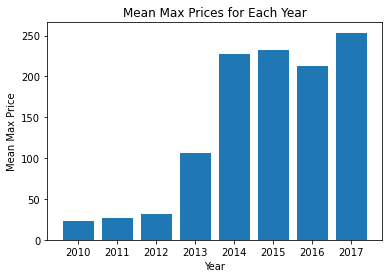

In [73]:
plt.bar(max_mean_price.index,max_mean_price.values)
plt.xlabel('Year')
plt.ylabel('Mean Max Price')
plt.title('Mean Max Prices for Each Year')
plt.show()

In [78]:
ammount_of_stocktraded = df.groupby('Year')['Volume'].sum()

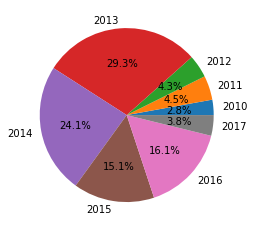

In [85]:
plt.pie(ammount_of_stocktraded,labels=ammount_of_stocktraded.index,autopct='%1.1f%%')
plt.show()

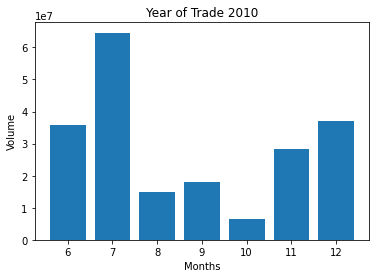

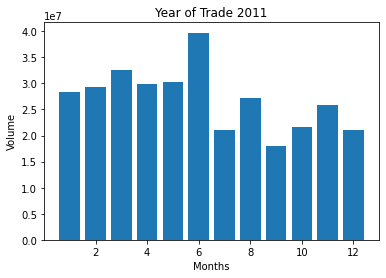

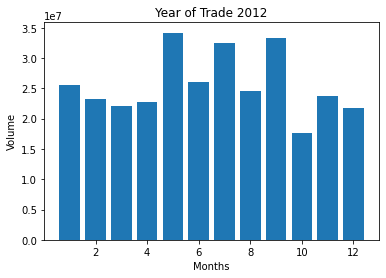

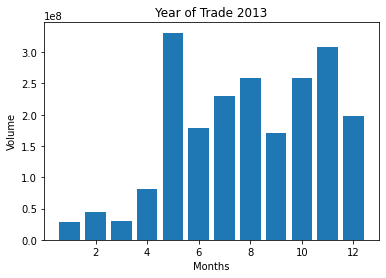

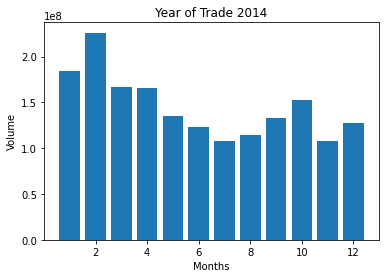

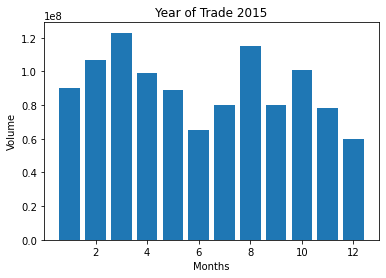

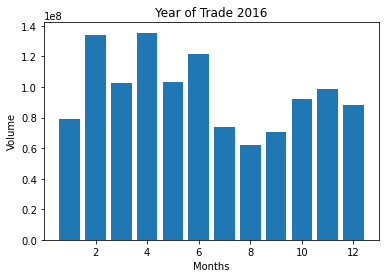

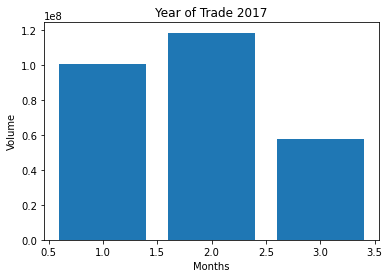

In [112]:
df['Month'] = df['Date'].dt.month
for year in range(2010, 2018):
    year_data = df[df['Year'] == year]
    monthly_trading = year_data.groupby('Month')['Volume'].sum()
    plt.bar(monthly_trading.index, monthly_trading.values)
    plt.title("Year of Trade "+str(year))
    plt.xlabel('Months')
    plt.ylabel("Volume")
    plt.show()

Text(0.5, 1.0, 'Starting Price of 2016')

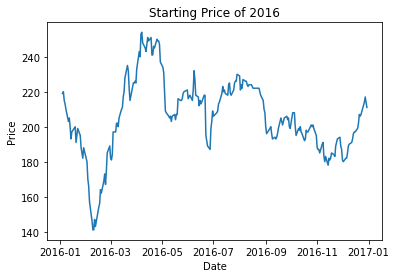

In [120]:
choosen_year = df[df['Year'] == 2016]
plt.plot(choosen_year['Date'], choosen_year['Low'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Starting Price of 2016')